# Love Thy Neighbour

In this Mission you'll learn all about distances between data points and how we can take insights from each point's neighbours. You will also learn two new models:

 - KNN for Classification
 - K-Means for Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## The Dataset

The provided dataset contains information about **penguins**:
 - `species`: (string) the penguin's species
 - `island`: (string) the penguin's origin island
 - `culmen_length_mm`: (number) culmen's length in milimiters 
 - `culmen_depth_mm`: (number) culmen's depth in milimiters 
 - `flipper_length_mm`: (number) flipper's length in milimiters
 - `body_mass_g`: (number) penguin's mass in grams
 - `is_male`: (integer) whether the penguin is male (1) or female (0)
 
### Load the data

In [2]:
train_df = pd.read_csv('penguins_train.csv')

## Tasks

Always start by taking a look at the dataset, getting familair with the variables and check any data issues, before diving into the problem.

## 1. Let's get different distances between all our points.
#### 1.1 Create a new dataframe with only the numerical columns

In [3]:
# Selecting only numerical columns
numerical_columns = ['culmen_length_mm', 'culmen_depth_mm',
                     'flipper_length_mm', 'body_mass_g']
df_num = train_df[numerical_columns]

#### 1.2. Create a new dataframe, called `all_comb` with all the combinations of pairs of points, *i.e.,* a dataframe with the following columns: 
**Question**: How many rows do you expect the dataframe to have?
```
['index_x', 'culmen_length_mm_x', 'culmen_depth_mm_x',
'flipper_length_mm_x', 'body_mass_g_x', 'index_y', 'culmen_length_mm_y',
'culmen_depth_mm_y', 'flipper_length_mm_y', 'body_mass_g_y']
```

*Hint:* Check `pd.merge` with parameter `how = 'cross'` and use `.reset_index()` to keep the original indexes of the points.

In [4]:
all_comb = df_num.reset_index().merge(df_num.reset_index(), how = 'cross')

#### 1.3. Build a function that receives a row of the dataframe `all_comb` and outputs the two points you want to measure distance between. That is:
 - point A should have info about `'culmen_length_mm_x', 'culmen_depth_mm_x','flipper_length_mm_x', 'body_mass_g_x'`
 - point B should have info about `'culmen_length_mm_y', 'culmen_depth_mm_y','flipper_length_mm_y', 'body_mass_g_y'`
 
*Hint:* Use `.to_numpy()` to turn a series into a numpy array.

In [5]:
def get_points(row):
    point_a = row[['culmen_length_mm_x', 'culmen_depth_mm_x',
                   'flipper_length_mm_x', 'body_mass_g_x']].to_numpy()
    point_b = row[['culmen_length_mm_y', 'culmen_depth_mm_y',
                   'flipper_length_mm_y', 'body_mass_g_y']].to_numpy()
    return point_a, point_b

#### 1.4. Build 3 functions corresponding to 3 different distances: they should receive a row of `all_comb` and output the corresponding distance from the two point in a row

In [6]:
from scipy.spatial.distance import cosine

def manhattan_distance(row):
    point_a, point_b = get_points(row)
    return np.abs(point_b-point_a).sum()

def euclidean_distance(row):
    point_a, point_b = get_points(row)
    return np.sqrt(((point_b-point_a)**2).sum())

def cosine_distance(row):
    point_a, point_b = get_points(row)
    return cosine(point_a,point_b)

#### 1.5. Create 3 new columns with the different distances between the points by `apply`ing your functions to the `all_comb` rows.
Note: It can take some time to run - your doing a lot of calculations!

In [7]:
all_comb['l1_dist'] = all_comb.apply(manhattan_distance, axis = 1)
all_comb['l2_dist'] = all_comb.apply(euclidean_distance, axis = 1)
all_comb['cosine_dist'] = all_comb.apply(cosine_distance, axis = 1)

## 2. Getting a point's neighbors 
#### 2.1 Get the 5 closest points to the penguin with original `index_x = 10` (using a distance of your choice).
*Note:* the closest point will always be the point itself with a distance of 0.

In [8]:
close_points = all_comb[all_comb['index_x']==10].sort_values(by = 'l1_dist').head(6)
close_points

,index_x,culmen_length_mm_x,culmen_depth_mm_x,flipper_length_mm_x,body_mass_g_x,index_y,culmen_length_mm_y,culmen_depth_mm_y,flipper_length_mm_y,body_mass_g_y,l1_dist,l2_dist,cosine_dist
2840,10,38.7,19.0,195.0,3450.0,10,38.7,19.0,195.0,3450.0,0.0,0.000000,0.000000e+00
2950,10,38.7,19.0,195.0,3450.0,120,36.0,17.8,195.0,3450.0,3.9,2.954657,3.654557e-07
2833,10,38.7,19.0,195.0,3450.0,3,36.7,19.3,193.0,3450.0,4.3,2.844293,3.379882e-07
2865,10,38.7,19.0,195.0,3450.0,35,36.0,17.9,190.0,3450.0,8.8,5.787918,1.398577e-06
2869,10,38.7,19.0,195.0,3450.0,39,35.0,17.9,190.0,3450.0,9.8,6.316645,1.666286e-06
2969,10,38.7,19.0,195.0,3450.0,139,46.4,18.6,190.0,3450.0,13.1,9.189668,3.534470e-06


#### 2.2. Using the indexes from the obtained points, check the original dataframe (with categorical features) to see if there is a pattern.

In [9]:
train_df.loc[close_points.index_y]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,is_male
10,Adelie,Torgersen,38.7,19.0,195.0,3450.0,0
120,Adelie,Dream,36.0,17.8,195.0,3450.0,0
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
35,Adelie,Dream,36.0,17.9,190.0,3450.0,0
39,Adelie,Biscoe,35.0,17.9,190.0,3450.0,0
139,Chinstrap,Dream,46.4,18.6,190.0,3450.0,0


#### 2.3. If you didn't know the species and gender of your penguin, based on its neighbours what would be your guess?

#### 2.4. 🤔  Look at the numerical variables' scale. What feature do you think is impacting the distance the most? Should this be the case? What can we do to prevent this?

#### (OPTIONAL) 2.5. Repeat the same exercise with different distances of your choice and compare the results.

## 3. Let's use Sklearn to predict a penguin's gender with the KNN model.
**Steps** 
 1. Import [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) model from Sklearn. 
 
 2. Create a dataframe `X` with the numerical features and a series `y` with the target (`is_male`)
 3. Instantiate the model `knn = KNeighborsClassifier()`
 4. Fit it on your data.
 5. Check what parameters `n_neighbors` and `metric` are in the documentation. What values are being used by default?
 6. Import classification metrics of your choice from sklearn.
 7. Use your trained model to make predictions for your dataset.
 8. Measure your model's performance with your classification metrics. 

In [5]:
# 1, 2, 3
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
X = df_num
y = train_df.is_male

In [6]:
# 4
knn.fit(X,y)

KNeighborsClassifier()

In [7]:
# 6
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

In [8]:
# 7
pred = knn.predict(X)

In [9]:
# 8
print('Accuracy', accuracy_score(y,pred))
print('F1 Score', f1_score(y,pred))
confusion_matrix(y,pred)

Accuracy 0.8268551236749117
F1 Score 0.8136882129277566


array([[127,  16],
       [ 33, 107]])

## 4. Comparing different models

**Steps:**
 1. Load the test data below
 
 2. Create variables `X_test` and `y_test`, similarly as you did before
 3. Define different `KNeighborsClassifier` models by choosing different values for `n_neighbors` and `metric` (see available distances [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.distance_metrics.html#sklearn.metrics.pairwise.distance_metrics)). You should use at least 4 models: 5 and 10 neighbors with Euclidean and Manhattan distances. (Feel free to test as many as you want)
 4. Use the provided function `get_metrics` to compare the different models.
 5. Which parameters yields a better peformance?

In [10]:
# Loading Test Data
test_df = pd.read_csv('penguins_test.csv')

# Function to get model's performance
def get_metrics(list_models, train_X, train_y, test_X, test_y):
    '''
    Receives:
     list_models: a list of non-trained models
     train_X: features of the training set (dataframe or array)
     train_y: target variable for the training set (Series or array)
     test_X: features of the test set
     test_y: target variable for the test set
     
     Outputs: a dataframe with each model, its accuracy and f1_score on the test set.
         
    '''
    accuracies = []
    f1_scores = []
    for model in list_models:
        model.fit(train_X,train_y)
        pred = model.predict(test_X)
        accuracies.append(accuracy_score(test_y,pred))
        f1_scores.append(f1_score(test_y,pred))
    return pd.DataFrame({'model': list_models,
                         'accuracy': accuracies,
                         'f1_score': f1_scores})

In [11]:
# 2

X_test = test_df[numerical_columns]
y_test = test_df.is_male

In [12]:
# 3

knn_5_l1 = KNeighborsClassifier(n_neighbors=5, metric = 'l1')
knn_10_l1 = KNeighborsClassifier(n_neighbors=10, metric = 'l1')
knn_20_l1 = KNeighborsClassifier(n_neighbors=20, metric = 'l1')

knn_5_l2 = KNeighborsClassifier(n_neighbors=5, metric = 'l2')
knn_10_l2 = KNeighborsClassifier(n_neighbors=10, metric = 'l2')
knn_20_l2 = KNeighborsClassifier(n_neighbors=20, metric = 'l2')

In [13]:
list_models  = [knn_5_l1, knn_10_l1, knn_20_l1, knn_5_l2, knn_10_l2, knn_20_l2]

In [14]:
# 4
get_metrics(list_models, X, y, X_test, y_test)

,model,accuracy,f1_score
0,KNeighborsClassifier(metric='l1'),0.80,0.821429
1,"KNeighborsClassifier(metric='l1', n_neighbors=10)",0.84,0.851852
2,"KNeighborsClassifier(metric='l1', n_neighbors=20)",0.74,0.779661
3,KNeighborsClassifier(metric='l2'),0.80,0.821429
4,"KNeighborsClassifier(metric='l2', n_neighbors=10)",0.84,0.851852
5,"KNeighborsClassifier(metric='l2', n_neighbors=20)",0.74,0.779661


## 5. The importance of scaling

**Steps:**
 1. Import [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) from Sklearn
 
 2. Instantiate (`scaler = StandardScaler()`) and fit your scaler on your training data
 3. Create two new datasets `X_train_scaled` and `X_test_scaled` by using your scaler to `transform` your training and test data
**🚨 You should ONLY fit your scaler on the training data. Test data is unseen data which we know nothing about at the moment of training, it will be scaled with the information we get from the training data**
 4. Re-run your `get_metrics` function with the same models as before bu using the scaled versions of your data: `X_train_scaled` and `X_test_scaled`.
 5. Contemplate the importance of scaling!

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_train_scaled = scaler.transform(X)
X_test_scaled = scaler.transform(X_test)

In [21]:
get_metrics(list_models, X_train_scaled, y, X_test_scaled, y_test)

,model,accuracy,f1_score
0,KNeighborsClassifier(metric='l1'),0.88,0.900000
1,"KNeighborsClassifier(metric='l1', n_neighbors=10)",0.92,0.933333
2,"KNeighborsClassifier(metric='l1', n_neighbors=20)",0.92,0.931034
3,KNeighborsClassifier(metric='l2'),0.86,0.881356
4,"KNeighborsClassifier(metric='l2', n_neighbors=10)",0.94,0.949153
5,"KNeighborsClassifier(metric='l2', n_neighbors=20)",0.92,0.931034


## 6. Clustering with KMeans

**Steps:**
 1. Import [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) from Sklearn.
 2. Create a **for** loop that for each value of **k** between 1 and 10: 
  1. Defines `model = KMeans()` with parameter **k**
  2. Fits model on `X_train_scaled`
  3. Saves model's inertia (`model.inertia_`) in a list
 
 3. Plot the values of inertia against values of k 
 4. Identify the elbow in the curve
 5. Define and fit a KMeans with `n_clusters = 3` on `X_train_scaled`
 6. Use your model to make predicitions on `X_train_scaled`, store the predictions on a variable named `clusters_3`
 7. Run the following command `plt.scatter(X.culmen_depth_mm,X.culmen_length_mm, c = clusters_3)`, plotting the original's data culmen_depth_mm vs. culmen_length_mm, with each point colored according to the cluster it belongs to. 
 8. What do you think the clusters could represent? Check your original dataframe's categorical features. 
 9. Use `pd.crosstab` to compare `clusters_3` with the `island` and `species` features. Which variable do the clusters seem to be representing?

**(OPTIONAL)** Repeat 5 - 8 with `n_clusters = 2` and compare predictions with the `is_male` variable. 

**⚠️ Remember:** Clustering is a type of Unsupervised Learning - there is **no target**. It is up to us to interpret what each cluster can represent and analyse each cluster in order to draw conclusions. 

In [22]:
# 1, 2

from sklearn.cluster import KMeans

list_k = np.arange(1,10)

inertias = []
for k in list_k:
    model = KMeans(k)
    model.fit(X_train_scaled)
    inertias.append(model.inertia_)

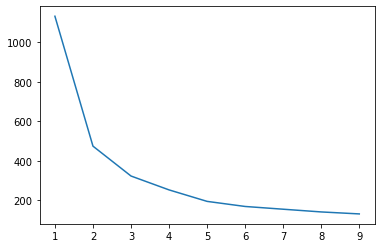

In [23]:
# 3

plt.plot(list_k,inertias);

In [24]:
# 5, 6

kmeans_3 = KMeans(3)
kmeans_3.fit(X_train_scaled)

clusters_3 = kmeans_3.predict(X_train_scaled)

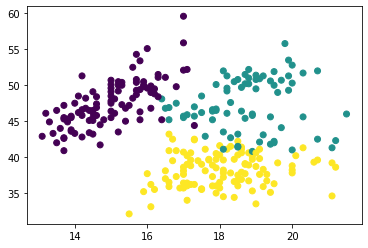

In [25]:
# 7
plt.scatter(X.culmen_depth_mm,X.culmen_length_mm, c = clusters_3);

In [26]:
# 9
pd.crosstab(train_df.species,clusters_3)

col_0,0,1,2
species,,,
Adelie,0,20,104
Chinstrap,0,55,5
Gentoo,99,0,0


In [27]:
# Optional

kmeans_2 = KMeans(2)
kmeans_2.fit(X_train_scaled)

clusters_2 = kmeans_2.predict(X_train_scaled)

pd.crosstab(y,clusters_2)

col_0,0,1
is_male,,
0,49,94
1,50,90
